# SRM Data Analysis in R

## IMPORT DATASET 
### Note: this script works with datasets downloaded from Skyline.  Skyline data is exported as report, and this script works with data with the following metrics: Protein Name, Transitions, Peptide Sequence, Fragment Ion, Peptide Retention Time, Area

In [26]:
# Check R Version
R.Version()

$platform
[1] "x86_64-apple-darwin13.4.0"

$arch
[1] "x86_64"

$os
[1] "darwin13.4.0"

$system
[1] "x86_64, darwin13.4.0"

$status
[1] ""

$major
[1] "3"

$minor
[1] "3.1"

$year
[1] "2016"

$month
[1] "06"

$day
[1] "21"

$`svn rev`
[1] "70800"

$language
[1] "R"

$version.string
[1] "R version 3.3.1 (2016-06-21)"

$nickname
[1] "Bug in Your Hair"

In [27]:
setwd("~/Documents/Roberts Lab/Geoduck-DNR/") 

# Import data set that was exported from Skyline
SRMreport <- read.csv("Data/2017-08-11_Transition Results_LHS modified-noRT-pivoted.csv", header=FALSE, na.strings = "#N/A", stringsAsFactors = FALSE) # import local file
head(SRMreport) 
# Import sequence file, which was exported from the Vantage computer at UWPR
SRMsequence <- read.csv("Data/2017-07-28_SRM-Sequence-final.csv", header=TRUE, stringsAsFactors = FALSE)
head(SRMsequence)
# Import my spreadsheet linking all sample ID's to site & treamtent (not just those used in this extraction/analysis)
sample.key <- read.csv("Data/2017-08-14-Geoduck-samples.csv", header=TRUE, stringsAsFactors = FALSE)
head(sample.key)
# Define vector of samples used in this experiment
SRMsamples <- noquote(as.character(c("G013", "G120", "G047", "G017", "G079", "G127", "G060", "G009", "G002", "G128", "G016", "G071-A", "G114", "G045", "G132", "G031", "G012", "G116", "G043", "G015", "G040", "G110", "G008", "G109", "G122", "G041", "G066", "G105", "G032", "G129", "G054", "G081", "G003", "G074", "G014", "G049", "G053", "G104", "G055", "G042", "G064", "G073", "G057", "G007", "G070", "G001", "G071-B", "G062")))

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120
Protein Name,Transition,Peptide Sequence,Fragment Ion,140 Area,141 Area,142 Area,143 Area,144 Area,146 Area,⋯,295 Area,297 Area,298 Area,299 Area,297_170728020436 Area,298_170728031737 Area,295_170728043038 Area,296_170728054337 Area,297_170728065636 Area,2017_July_10_bivalves_298_170728080936 Area
Heat shock protein HSP 90-alpha cds.comp132209_c0_seq1|m.20047,D - y11+,GVVDSEDLPLNISR,y11,987740,1501808,974459,1172389,2052848,1189673,⋯,327965,634531,2102120,1035796,26812,2236330,1834478,868152,786292,1556222
Heat shock protein HSP 90-alpha cds.comp132209_c0_seq1|m.20047,L - y7+,GVVDSEDLPLNISR,y7,1910000,3157734,1884468,2400880,4622060,2411904,⋯,656517,1269235,4486091,2102028,63410,4793080,3859476,1702754,1502077,3222525
Heat shock protein HSP 90-alpha cds.comp132209_c0_seq1|m.20047,P - y6+,GVVDSEDLPLNISR,y6,6176002,9747394,6047505,7645407,14886697,7507701,⋯,2129922,3914464,13865937,6612078,207577,14797133,12051782,5428619,4017097,9729643
Heat shock protein HSP 90-alpha cds.comp132209_c0_seq1|m.20047,Q - y8+,EVVQSSAFVER,y8,3556501,3969099,2668249,3662459,7219750,2302575,⋯,1068648,2338458,5556023,3729345,200352,5445776,3865294,2482067,3237069,5384831
Heat shock protein HSP 90-alpha cds.comp132209_c0_seq1|m.20047,S - y7+,EVVQSSAFVER,y7,6138959,6825041,4442289,6438165,13010634,3904433,⋯,1770149,3807361,9635571,6323986,295718,9488573,6605272,3964891,5480707,9398488


File.Name,Replicate.Name,Comment,Technical.rep,Sample...rep.name,Path,Instrument.Method,Position,Inj.Vol,Est..time.into.mass.spec.tray,Time.injected
2017_July_10_bivalves_1,1,blank,,,C:\Xcalibur\Data\Collaborators\Nunn\Emma\data_378,C:\Xcalibur\Data\Collaborators\Nunn\Emma\methods\Vantage_nanoAcq_blank_4min_DrM27cm,"1:A,2",3,NA,NA
2017_July_10_bivalves_2,2,O49,,,C:\Xcalibur\Data\Collaborators\Nunn\Emma\data_378,C:\Xcalibur\Data\Collaborators\Nunn\Emma\methods\Vantage_nanoAcq_oysterYV_60min_DrM27cm,"1:B,1",2,NA,NA
2017_July_10_bivalves_3,3,O52,,,C:\Xcalibur\Data\Collaborators\Nunn\Emma\data_378,C:\Xcalibur\Data\Collaborators\Nunn\Emma\methods\Vantage_nanoAcq_oysterYV_60min_DrM27cm,"1:B,2",2,NA,NA
2017_July_10_bivalves_4,4,O102,,,C:\Xcalibur\Data\Collaborators\Nunn\Emma\data_378,C:\Xcalibur\Data\Collaborators\Nunn\Emma\methods\Vantage_nanoAcq_oysterYV_60min_DrM27cm,"1:B,3",2,NA,NA
2017_July_10_bivalves_5,5,O01,,,C:\Xcalibur\Data\Collaborators\Nunn\Emma\data_378,C:\Xcalibur\Data\Collaborators\Nunn\Emma\methods\Vantage_nanoAcq_oysterYV_60min_DrM27cm,"1:B,4",2,NA,NA
2017_July_10_bivalves_6,6,O122,,,C:\Xcalibur\Data\Collaborators\Nunn\Emma\data_378,C:\Xcalibur\Data\Collaborators\Nunn\Emma\methods\Vantage_nanoAcq_oysterYV_60min_DrM27cm,"1:B,5",2,NA,NA


Box..,Round,Site,Spp,Patch,Exclosure,Rep,PRVial,Sample.Shorthand,MS.MS.Date,⋯,Includes,X..Samples.Box,X,X.1,X.2,X.3,X.4,X.5,X.6,X.7
2,1,CI,Pg,E,2,1,G001,CI-E,,⋯,"Round 1 -> Bare -> Cl, FB, PG, SK, WB",52,,,,NA,,,,
2,1,CI,Pg,E,2,2,G002,CI-E,,⋯,"Round 1 -> Eel -> Cl, FB, PG, SK, WB",60,,,,NA,,,,
2,1,CI,Pg,E,2,3,G003,CI-E,,⋯,"Round 2 -> Bare -> Cl, FB, PG, SK, WB",35,,,,NA,,,,
2,1,CI,Pg,E,2,4,G004,CI-E,,⋯,"Round 2 -> Eel -> Cl, FB, PG, SK, WB",33,,,,NA,,,,
2,1,CI,Pg,E,1,1,G005,CI-E,,⋯,,,,,,NA,,,,
2,1,CI,Pg,E,3,1,G006,CI-E,,⋯,,,,,,NA,,,,


### REPLACE REP NAMES WITH SAMPLE NAMES
### I could also probably use the function merge() for this task, but did not.

In [28]:
SRMreport[1,] # view replicate names
length(SRMreport[1,]) # Number of replicates I ran on mass spec
rep.names <- SRMreport[1,] # create vector of replicate names
rep.names.short <- noquote(gsub(' Area', '', rep.names)) # remove Area from rep name, and don't include quotes 
rep.names.short # check to confirm correct names
rep.names.short <- noquote(gsub('2017_July_10_bivalves_', '', rep.names.short)) #remove the extra long rep name that is a residual from the .raw file name
length(rep.names.short)
SRMsequence$Sample...rep.name
noquote(as.character(SRMsequence$Sample...rep.name))
repsTOsamples <- as.data.frame(SRMsequence[,c(2,3,5)])
library(dplyr)
repsTOsamples.filtered <- filter(repsTOsamples, repsTOsamples[,1] %in% rep.names.short)
samples <- as.character(repsTOsamples.filtered$Sample...rep.name)
other.headers <- as.character(rep.names.short[1:4])
samples.vector <- noquote(c(other.headers, samples, stringsAsFactors = FALSE))
samples.vector <- samples.vector[-121]
SRM.data <- SRMreport
SRM.data[1,] <- samples.vector
ncol(SRM.data) #confirm still have the correct # columns
colnames(SRM.data) <- SRM.data[1,] #make first row column names

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120
Protein Name,Transition,Peptide Sequence,Fragment Ion,140 Area,141 Area,142 Area,143 Area,144 Area,146 Area,⋯,295 Area,297 Area,298 Area,299 Area,297_170728020436 Area,298_170728031737 Area,295_170728043038 Area,296_170728054337 Area,297_170728065636 Area,2017_July_10_bivalves_298_170728080936 Area


[1] 120

  [1] Protein Name                          
  [2] Transition                            
  [3] Peptide Sequence                      
  [4] Fragment Ion                          
  [5] 140                                   
  [6] 141                                   
  [7] 142                                   
  [8] 143                                   
  [9] 144                                   
 [10] 146                                   
 [11] 147                                   
 [12] 148                                   
 [13] 149                                   
 [14] 150                                   
 [15] 152                                   
 [16] 153                                   
 [17] 154                                   
 [18] 155                                   
 [19] 156                                   
 [20] 158                                   
 [21] 159                                   
 [22] 160                                   
 [23] 161 

[1] 120

[1] ""              ""              ""              ""             
  [5] ""              ""              ""              ""             
  [9] ""              ""              ""              ""             
 [13] ""              ""              ""              ""             
 [17] ""              ""              ""              ""             
 [21] ""              ""              ""              ""             
 [25] ""              ""              ""              ""             
 [29] ""              ""              ""              ""             
 [33] ""              ""              ""              ""             
 [37] ""              ""              ""              ""             
 [41] ""              ""              ""              ""             
 [45] ""              ""              ""              ""             
 [49] ""              ""              ""              ""             
 [53] ""              ""              ""              ""             
 [57] ""              ""              ""              ""             
 [61] ""              ""              ""              ""             
 [65] ""              ""              ""              ""             
 [69] ""              ""              ""              ""             
 [73] ""              ""              ""              ""             
 [77] ""              ""              ""              ""             
 [81] ""              ""              ""              ""             
 [85] ""              ""              ""              ""             
 [89] ""              ""              ""              ""             
 [93] ""              ""              ""              ""             
 [97] ""              ""              ""              ""             
[101] ""              ""              ""              ""             
[105] ""              ""              ""              ""             
[109] ""              ""              ""              ""             
[113] ""              ""              ""              ""             
[117] ""              ""              ""              ""             
[121] ""              ""              ""              ""             
[125] ""              ""              ""              ""             
[129] ""              ""              ""              ""             
[133] ""              ""              ""              ""             
[137] ""              ""              ""              ""             
[141] "G013-A"        "G120-A"        "G047-A"        "G017-A"       
[145] "G079-A"        "blank-"        "G127-A"        "G060-A"       
[149] "G009-A"        "G002-A"        "G128-A"        "blank-"       
[153] "G016-A"        "G071-A-A"      "G114-A"        "G045-A"       
[157] "G132-A"        "blank-"        "G031-A"        "G012-A"       
[161] "G116-A"        "G043-A"        "G015-A"        "blank-"       
[165] "G040-A"        "G110-A"        "G008-A"        "G109-A"       
[169] "G122-A"        "blank-"        "G041-A"        "G066-A"       
[173] "G105-A"        "G032-A"        "G129-A"        "blank-"       
[177] "G054-A"        "G081-A"        "G003-A"        "G074-A"       
[181] "G014-A"        "blank-"        "G049-A"        "G053-A"       
[185] "G104-A"        "G055-A"        "G042-A"        "blank-"       
[189] "G064-A"        "G073-A"        "G057-A"        "G007-A"       
[193] "G070-A"        "blank-"        "G001-A"        "G071-B-A"     
[197] "G062-A"        "G013-B"        "G120-B"        "blank-"       
[201] "blank-"        "G062-B"        "G013-C"        "G120-B"       
[205] "G047-B"        "G017-B"        "blank-"        "G079-B"       
[209] "G127-B"        "G053-B"        "G104-B"        "blank-"       
[213] "G060-B"        "G009-B"        "G002-B"        "G128-B"       
[217] "G016-B"        "blank-"        "G071-A-B"      "G114-B"       
[221] "G045-B"        "G132-C"        "G031-B"        "blank-"       
[225] "G132-D"        "G031-C"        "G012-B"        "G116-B"       
[229] "G043-

  [1]                                                                      
  [6]                                                                      
 [11]                                                                      
 [16]                                                                      
 [21]                                                                      
 [26]                                                                      
 [31]                                                                      
 [36]                                                                      
 [41]                                                                      
 [46]                                                                      
 [51]                                                                      
 [56]                                                                      
 [61]                                                                      
 [66]       

[1] 120

## ANNOTATE SAMPLE NAMES WITH SITE & TREATMENT

In [29]:
head(sample.key) #check out layout of sample.key
head(sample.key[,c(8,9)]) #confirm that columns 8&9 are sample ID & treatment/site shorthand
repsTOsamples.filtered.annotated <- filter(sample.key[,c(8,9)], sample.key$PRVial %in% repsTOsamples.filtered$Comment) #pull site & treatment from sample key
length(SRMsamples) # check # samples there should be total
nrow(repsTOsamples.filtered.annotated) # check # samples is appropriate
repsTOsamples.filtered.annotated # Check out results; NOTE: missing 71-A & 71-B, will add @ next step

Box..,Round,Site,Spp,Patch,Exclosure,Rep,PRVial,Sample.Shorthand,MS.MS.Date,⋯,Includes,X..Samples.Box,X,X.1,X.2,X.3,X.4,X.5,X.6,X.7
2,1,CI,Pg,E,2,1,G001,CI-E,,⋯,"Round 1 -> Bare -> Cl, FB, PG, SK, WB",52,,,,NA,,,,
2,1,CI,Pg,E,2,2,G002,CI-E,,⋯,"Round 1 -> Eel -> Cl, FB, PG, SK, WB",60,,,,NA,,,,
2,1,CI,Pg,E,2,3,G003,CI-E,,⋯,"Round 2 -> Bare -> Cl, FB, PG, SK, WB",35,,,,NA,,,,
2,1,CI,Pg,E,2,4,G004,CI-E,,⋯,"Round 2 -> Eel -> Cl, FB, PG, SK, WB",33,,,,NA,,,,
2,1,CI,Pg,E,1,1,G005,CI-E,,⋯,,,,,,NA,,,,
2,1,CI,Pg,E,3,1,G006,CI-E,,⋯,,,,,,NA,,,,


PRVial,Sample.Shorthand
G001,CI-E
G002,CI-E
G003,CI-E
G004,CI-E
G005,CI-E
G006,CI-E


[1] 48

[1] 46

PRVial,Sample.Shorthand
G001,CI-E
G002,CI-E
G003,CI-E
G007,CI-E
G008,CI-E
G009,CI-E
G012,CI-B
G013,CI-B
G014,CI-B
G015,CI-B


## Add G071-A & G071-B coding to the annotated key
Because I had two samples that were labeled "G071" I labeled them -A & -B. I think that one is actually 72, but still need to confirm. My previous step left these samples out of the repsTOsamples.filtered.annotated data.frame, so I will add them here: 

In [30]:
s71.A <- data.frame(matrix(0, ncol=2, nrow=1))
s71.A[1,1] <- "G071.A"
s71.A[1,2] <- "PG-E"
colnames(s71.A) <- colnames(repsTOsamples.filtered.annotated)
s71.B <- data.frame(matrix(0, ncol=2, nrow=1))
s71.B[1,1] <- "G071.B"
s71.B[1,2] <- "PG-E"
colnames(s71.B) <- colnames(repsTOsamples.filtered.annotated)
# row bind annotated key w/ 71 info
sample.key.annotated <- rbind(repsTOsamples.filtered.annotated, s71.A, s71.B)

## Create vectors with sample names for each site & treatment

In [31]:

# Subset sample names for site & treatment combos
CI.E <- sample.key.annotated[c(sample.key.annotated$Sample.Shorthand == "CI-E"),]
CI.B <- sample.key.annotated[c(sample.key.annotated$Sample.Shorthand == "CI-B"),]
PG.E <- sample.key.annotated[c(sample.key.annotated$Sample.Shorthand == "PG-E"),]
PG.B <- sample.key.annotated[c(sample.key.annotated$Sample.Shorthand == "PG-B"),]
WB.E <- sample.key.annotated[c(sample.key.annotated$Sample.Shorthand == "WB-E"),]
WB.B <- sample.key.annotated[c(sample.key.annotated$Sample.Shorthand == "WB-B"),]
FB.E <- sample.key.annotated[c(sample.key.annotated$Sample.Shorthand == "FB-E"),]
FB.B <- sample.key.annotated[c(sample.key.annotated$Sample.Shorthand == "FB-B"),]

# Isolate just sample names for each site/treatment combo
CI.E.samples <- CI.E$PRVial
CI.B.samples <- CI.B$PRVial
PG.E.samples <- PG.E$PRVial
PG.B.samples <- PG.B$PRVial
WB.E.samples <- WB.E$PRVial
WB.B.samples <- WB.B$PRVial
FB.E.samples <- FB.E$PRVial
FB.B.samples <- FB.B$PRVial

# Isolate eelgrass and bare group sample names
Eelgrass.samples <- c(CI.E.samples, PG.E.samples, WB.E.samples, FB.E.samples)
Bare.samples <- c(CI.B.samples, PG.B.samples, WB.B.samples, FB.B.samples)

## CONVERT AREA DATA TO NUMERIC FORMAT
Area values need to be numeric to manipulate

In [32]:
SRM.data.numeric <- SRM.data 
SRM.data.numeric[,5:120] <- as.numeric(  # I know that my area data is from column 5 to 120 
  as.character(
    unlist(
      SRM.data.numeric[,5:120])
  )
)
is.numeric(SRM.data.numeric[2,20]) # confirm area data is numeric, using a random cell. Should equal TRUE.

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

[1] TRUE

 ## NAME EACH ROW WITH A UNIQUE TRANSITION ID 
 This is so I can use one column/row name as a reference for each transition

In [33]:
nTransitions <- length(SRM.data.numeric$Transition) # How many transitions are there?
Transition.ID <- vector(length=nTransitions) # create empty vector with length= number of transitions
for (i in 1:nTransitions) {  
  Transition.ID[i] <- paste(SRM.data.numeric[i,3], SRM.data.numeric[i,4])}  # loop that fills empty vector with unique transition ID, built from the peptide sequence (column 3) and the fragment ion (columm 4)
Transition.ID # confirm correctly named transition IDs
length(SRM.data.numeric$Transition) == length(Transition.ID) # confirm that I didn't lose any transitions
row.names(SRM.data.numeric) <- Transition.ID # assign newly created transition IDs as row names
head(SRM.data.numeric) # confirm changes
write.csv(SRM.data.numeric, file="Data/2017-08-24_SRM-data-numeric.csv") #write this file out for safe keeping

[1] "Peptide Sequence Fragment Ion" "GVVDSEDLPLNISR y11"           
  [3] "GVVDSEDLPLNISR y7"             "GVVDSEDLPLNISR y6"            
  [5] "EVVQSSAFVER y8"                "EVVQSSAFVER y7"               
  [7] "EVVQSSAFVER y6"                "DSSTMGYMAAK y8"               
  [9] "DSSTMGYMAAK y7"                "DSSTMGYMAAK y6"               
 [11] "TTPSYVAFNDTER y8"              "TTPSYVAFNDTER y7"             
 [13] "TTPSYVAFNDTER y6"              "NAVVTVPAYFNDAQR y12"          
 [15] "NAVVTVPAYFNDAQR y11"           "NAVVTVPAYFNDAQR y9"           
 [17] "IINEPTAAALAYGLDK y12"          "IINEPTAAALAYGLDK y9"          
 [19] "IINEPTAAALAYGLDK y6"           "THGAPTDEER y7"                
 [21] "THGAPTDEER y6"                 "THGAPTDEER y3"                
 [23] "ISLTGPHSIIGR y9"               "ISLTGPHSIIGR y8"              
 [25] "ISLTGPHSIIGR y7"               "TIVVHADVDDLGK y9"             
 [27] "TIVVHADVDDLGK y8"              "APNSFNLR y5"                  
 [29] "APNSFNLR y4"                   "APNSFNLR y3"                  
 [31] "VLYPNDNFFEGK y9"               "VLYPNDNFFEGK y8"              
 [33] "VLYPNDNFFEGK y4"               "TSFDAFPDK y6"                 
 [35] "TSFDAFPDK y5"                  "TSFDAFPDK y3"                 
 [37] "IITRPFNVNGLLAYDSR y6"          "IITRPFNVNGLLAYDSR y5"         
 [39] "IITRPFNVNGLLAYDSR y4"          "WLDESGVFLPEEHPSR y9"          
 [41] "WLDESGVFLPEEHPSR y7"           "WLDESGVFLPEEHPSR y4"          
 [43] "QSLLPFGATGPR y8"               "QSLLPFGATGPR y7"              
 [45] "QSLLPFGATGPR y6"               "AGELGGSDPDYAMR y10"           
 [47] "AGELGGSDPDYAMR y6"             "AGELGGSDPDYAMR y4"            
 [49] "LYSYSDTHR y6"                  "LYSYSDTHR y5"                 
 [51] "LYSYSDTHR y3"                  "LTANIAGHLIGAQEFIQK y9"        
 [53] "LTANIAGHLIGAQEFIQK y8"         "LTANIAGHLIGAQEFIQK y3"        
 [55] "ALFIIDDK y5"                   "ALFIIDDK y4"                  
 [57] "ALFIIDDK y3"                   "QITMNDLPVGR y7"               
 [59] "QITMNDLPVGR y5"                "QITMNDLPVGR y4"               
 [61] "LVQAFQFTDK y7"                 "LVQAFQFTDK y6"                
 [63] "LVQAFQFTDK y4"                 "AAQDNGLLTDVLAYK y8"           
 [65] "AAQDNGLLTDVLAYK y7"            "AAQDNGLLTDVLAYK y3"           
 [67] "ALELGLKPK y6"                  "ALELGLKPK y5"                 
 [69] "ALELGLKPK y3"                  "FNLWGGSLSLGHPFGATGVR y12"     
 [71] "FNLWGGSLSLGHPFGATGVR y10"      "FNLWGGSLSLGHPFGATGVR y8"      
 [73] "VVLVGDSGVGK y7"                "VVLVGDSGVGK y5"               
 [75] "STIGVEFATR y7"                 "STIGVEFATR y5"                
 [77] "STIGVEFATR y4"                 "AQLWDTAGQER y8"               
 [79] "AQLWDTAGQER y7"                "AQLWDTAGQER y6"               
 [81] "TVIEPMAGDGLR y9"               "TVIEPMAGDGLR y8"              
 [83] "TVIEPMAGDGLR y6"               "MVTGDNVNTAR y8"               
 [85] "MVTGDNVNTAR y6"                "MVTGDNVNTAR y4"               
 [87] "LLDQVWPDLR y6"                 "LLDQVWPDLR y5"                
 [89] "LLDQVWPDLR y4"                 "LNSGSVGVYR y7"                
 [91] "LNSGSVGVYR y5"                 "LNSGSVGVYR y4"                
 [93] "SLTENFVTEEQAK y7"              "SLTENFVTEEQAK y6"             
 [95] "SLTENFVTEEQAK y4"              "SIQQSVENIR y7"                
 [97] "SIQQSVENIR y6"                 "SIQQSVENIR y4"                
 [99] "NNKPSDYQGGR y8"                "NNKPSDYQGGR y7"               
[101] "NNKPSDYQGGR y5"                "DNVVVIGFFK y7"                
[103] "DNVVVIGFFK y6"                 "DNVVVIGFFK y5"                
[105] "MDSTANEVEDVK y8"               "MDSTANEVEDVK y7"              
[107] "MDSTANEVEDVK y5"               "APGLPAQIK y6"                 
[109] "APGLPAQIK y5"                  "APGLPAQIK y4"                 
[111] "MDVEGTLPEDLK y9"               "MDVEGTLPEDLK y8"              
[113] "MDVEGTLPEDLK y5"               "GLGLGGVPGQNGK y9"             
[115] "GLGLG

[1] TRUE

,Protein Name,Transition,Peptide Sequence,Fragment Ion,G013-A,G120-A,G047-A,G017-A,G079-A,G127-A,⋯,G109-C,G104-remake-D,G053-remake-D,G114-remake-D,G042-C,G073-C,G003-C,G057-C,G055-C,G070-C
Peptide Sequence Fragment Ion,Protein Name,Transition,Peptide Sequence,Fragment Ion,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
GVVDSEDLPLNISR y11,Heat shock protein HSP 90-alpha cds.comp132209_c0_seq1|m.20047,D - y11+,GVVDSEDLPLNISR,y11,987740,1501808,974459,1172389,2052848,1189673,⋯,327965,634531,2102120,1035796,26812,2236330,1834478,868152,786292,1556222
GVVDSEDLPLNISR y7,Heat shock protein HSP 90-alpha cds.comp132209_c0_seq1|m.20047,L - y7+,GVVDSEDLPLNISR,y7,1910000,3157734,1884468,2400880,4622060,2411904,⋯,656517,1269235,4486091,2102028,63410,4793080,3859476,1702754,1502077,3222525
GVVDSEDLPLNISR y6,Heat shock protein HSP 90-alpha cds.comp132209_c0_seq1|m.20047,P - y6+,GVVDSEDLPLNISR,y6,6176002,9747394,6047505,7645407,14886697,7507701,⋯,2129922,3914464,13865937,6612078,207577,14797133,12051782,5428619,4017097,9729643
EVVQSSAFVER y8,Heat shock protein HSP 90-alpha cds.comp132209_c0_seq1|m.20047,Q - y8+,EVVQSSAFVER,y8,3556501,3969099,2668249,3662459,7219750,2302575,⋯,1068648,2338458,5556023,3729345,200352,5445776,3865294,2482067,3237069,5384831
EVVQSSAFVER y7,Heat shock protein HSP 90-alpha cds.comp132209_c0_seq1|m.20047,S - y7+,EVVQSSAFVER,y7,6138959,6825041,4442289,6438165,13010634,3904433,⋯,1770149,3807361,9635571,6323986,295718,9488573,6605272,3964891,5480707,9398488


In [34]:
getwd()

[1] "/Users/shlaura3/Documents/Roberts Lab/Geoduck-DNR"

## NORMALIZE BASED ON PRTC ABUNDANCE
Note: I'm not sure whether this is the best way to normalize my data. PRTC abundance was very different depending on the batch of PRTC I used to prepare my samples. I used 4 different PRTC batches. Batch D was prepared using (theoretically) a standard at 10% the concentration of the other batches (A-C). However, there are other significant differences in concentrations. For example, Batch B included just 4 samples, and was prepared using a PRTC standard prepared by Yaamini that obviously had much higher concentration.  Here are some images from Skyline showing 2 PRTC peptides abundances across all samples (this includes technical replicates).  X axis represents injection time. 

![PRTC peptide 1](https://github.com/laurahspencer/Geoduck-DNR/blob/master/Images/2017-08-24-PRTC-peptide1.png?raw=true)

![PRTC peptide 2](https://github.com/laurahspencer/Geoduck-DNR/blob/master/Images/2017-08-24-PRTC-peptide2.png?raw=true)

## Subset SRM data to only include PRTC transition data

In [35]:
# Extract PRTC peptides 
SRM.data.numeric[115:142,1:5] #check out which rows pertain to PRTC peptides, it's 117->142
SRM.PRTC <- SRM.data.numeric[117:142,] #pull out PRTC data for each sample
head(SRM.PRTC)
ncol(SRM.PRTC[,-1:-4])

,Protein Name,Transition,Peptide Sequence,Fragment Ion,G013-A
GLGLGGVPGQNGK y8,Arachidonate 5-lipoxygenase cds.comp135856_c0_seq2|m.25326,G - y8+,GLGLGGVPGQNGK,y8,308458
GLGLGGVPGQNGK y6,Arachidonate 5-lipoxygenase cds.comp135856_c0_seq2|m.25326,P - y6+,GLGLGGVPGQNGK,y6,1793906
LTILEELR y6,PRTC peptides,I - y6+,LTILEELR,y6,29599972
LTILEELR y5,PRTC peptides,L - y5+,LTILEELR,y5,25329132
LTILEELR y4,PRTC peptides,E - y4+,LTILEELR,y4,11063187
GLILVGGYGTR y8,PRTC peptides,L - y8+,GLILVGGYGTR,y8,39989552
GLILVGGYGTR y7,PRTC peptides,V - y7+,GLILVGGYGTR,y7,61235908
GLILVGGYGTR y6,PRTC peptides,G - y6+,GLILVGGYGTR,y6,69625376
ELGQSGVDTYLQTK y10,PRTC peptides,S - y10+,ELGQSGVDTYLQTK,y10,9266561
ELGQSGVDTYLQTK y7,PRTC peptides,D - y7+,ELGQSGVDTYLQTK,y7,9438717


,Protein Name,Transition,Peptide Sequence,Fragment Ion,G013-A,G120-A,G047-A,G017-A,G079-A,G127-A,⋯,G109-C,G104-remake-D,G053-remake-D,G114-remake-D,G042-C,G073-C,G003-C,G057-C,G055-C,G070-C
LTILEELR y6,PRTC peptides,I - y6+,LTILEELR,y6,29599972,25449096,43859836,27587238,26075618,30520362,⋯,189259984,20740892,11425768,11039203,84594504,99182200,86574256,111955944,103300664,89775000
LTILEELR y5,PRTC peptides,L - y5+,LTILEELR,y5,25329132,21630980,37530300,23651940,22551560,26273644,⋯,182125552,16915718,9208968,8743761,75312016,93760496,81337728,104745656,98091304,83420880
LTILEELR y4,PRTC peptides,E - y4+,LTILEELR,y4,11063187,9320385,16863806,10497707,9757952,11783441,⋯,147084560,6895769,3647350,3392284,37863456,52345580,43048908,60376828,58836828,43438424
GLILVGGYGTR y8,PRTC peptides,L - y8+,GLILVGGYGTR,y8,39989552,26801878,50610572,32404204,25639908,33521370,⋯,177753968,15875705,10034751,9980893,86828488,53610808,55804428,70681696,74773768,56827760
GLILVGGYGTR y7,PRTC peptides,V - y7+,GLILVGGYGTR,y7,61235908,41211800,78516248,50214160,39880040,52204952,⋯,208954624,23643966,14680952,14650554,116658880,83389696,86192040,104070568,112402864,89290208
GLILVGGYGTR y6,PRTC peptides,G - y6+,GLILVGGYGTR,y6,69625376,46342556,88895296,56573192,44317276,58515280,⋯,213879120,23770612,14084906,14249728,123025816,93627160,95885480,113015352,122250560,98030384


[1] 116

## Discard poor quality PRTC peptides 
These poor quality peptides eluted early and late for this analysis since their quantities are less stable. These were identified via Skyline:
  * **Good quality** are: "LTILEELR", "GLILVGGYGTR", "ELGQSGVDTYLQTK", "SAAGAFGPELSR", "TASEFDSAIAQDK"
  * **Poor Quality** are: "IGDYAGIK", "DIPVPKPK", "HVLTSIGEK", "GISNEGQNASIK", "SSAAPPPPPR"

In [36]:
rownames(SRM.PRTC)
SRM.PRTC.good <- SRM.PRTC[1:12,]
head(SRM.PRTC.good)
ncol(SRM.PRTC.good[,-1:-4]) #confirm I still have the same # samples; should be 116

[1] "LTILEELR y6"        "LTILEELR y5"        "LTILEELR y4"       
 [4] "GLILVGGYGTR y8"     "GLILVGGYGTR y7"     "GLILVGGYGTR y6"    
 [7] "ELGQSGVDTYLQTK y10" "ELGQSGVDTYLQTK y7"  "SAAGAFGPELSR y7"   
[10] "SAAGAFGPELSR y6"    "TASEFDSAIAQDK y9"   "TASEFDSAIAQDK y8"  
[13] "IGDYAGIK y6"        "IGDYAGIK y5"        "DIPVPKPK y6"       
[16] "DIPVPKPK y5"        "DIPVPKPK y4"        "HVLTSIGEK y7"      
[19] "HVLTSIGEK y6"       "HVLTSIGEK y5"       "GISNEGQNASIK y10"  
[22] "GISNEGQNASIK y8"    "GISNEGQNASIK y7"    "SSAAPPPPPR y6"     
[25] "SSAAPPPPPR y5"      "SSAAPPPPPR y4"

,Protein Name,Transition,Peptide Sequence,Fragment Ion,G013-A,G120-A,G047-A,G017-A,G079-A,G127-A,⋯,G109-C,G104-remake-D,G053-remake-D,G114-remake-D,G042-C,G073-C,G003-C,G057-C,G055-C,G070-C
LTILEELR y6,PRTC peptides,I - y6+,LTILEELR,y6,29599972,25449096,43859836,27587238,26075618,30520362,⋯,189259984,20740892,11425768,11039203,84594504,99182200,86574256,111955944,103300664,89775000
LTILEELR y5,PRTC peptides,L - y5+,LTILEELR,y5,25329132,21630980,37530300,23651940,22551560,26273644,⋯,182125552,16915718,9208968,8743761,75312016,93760496,81337728,104745656,98091304,83420880
LTILEELR y4,PRTC peptides,E - y4+,LTILEELR,y4,11063187,9320385,16863806,10497707,9757952,11783441,⋯,147084560,6895769,3647350,3392284,37863456,52345580,43048908,60376828,58836828,43438424
GLILVGGYGTR y8,PRTC peptides,L - y8+,GLILVGGYGTR,y8,39989552,26801878,50610572,32404204,25639908,33521370,⋯,177753968,15875705,10034751,9980893,86828488,53610808,55804428,70681696,74773768,56827760
GLILVGGYGTR y7,PRTC peptides,V - y7+,GLILVGGYGTR,y7,61235908,41211800,78516248,50214160,39880040,52204952,⋯,208954624,23643966,14680952,14650554,116658880,83389696,86192040,104070568,112402864,89290208
GLILVGGYGTR y6,PRTC peptides,G - y6+,GLILVGGYGTR,y6,69625376,46342556,88895296,56573192,44317276,58515280,⋯,213879120,23770612,14084906,14249728,123025816,93627160,95885480,113015352,122250560,98030384


[1] 116

## Assign PRTC batches based on which PRTC mix samples were made with

In [37]:
SRM.PRTC.a <- cbind(
  SRM.PRTC.good[,1:4], 
  SRM.PRTC.good[, grepl("G013|G120|G047|G017|G079|G127|G060|G009|G002|G128|G016|G071-A|G114|G045|G132|G031|G012|G116|G043|G015|G040", names(SRM.PRTC)) & !grepl("remake", names(SRM.PRTC))]
)

SRM.PRTC.b <- cbind(
  SRM.PRTC.good[,1:4],
  SRM.PRTC.good[, grepl("G110|G008|G109|G122", names(SRM.PRTC))]
)

SRM.PRTC.c <- cbind(
  SRM.PRTC.good[,1:4],
  SRM.PRTC.good[, grepl("G041|G066|G105|G032|G129|G054|G081|G003|G074|G014|G049|G053|G104|G055|G042|G064|G073|G057|G007|G070|G001|G071-B|G062", names(SRM.PRTC)) & !grepl("remake", names(SRM.PRTC))]
)

SRM.PRTC.d <- cbind(
  SRM.PRTC.good[,1:4],
  SRM.PRTC.good[, grepl("G114.remake|G053.remake|G104.remake", names(SRM.PRTC))]
)

## Calculate mean abundance for each transition within PRTC batches

In [38]:
# PRTC batch A
SRM.PRTC.a.mean <- 1:nrow(SRM.PRTC.a)# Create vector to be filled by loop with mean PRTC area
for (i in SRM.PRTC.a.mean) { 
  SRM.PRTC.a.mean[i] <- rowMeans(SRM.PRTC.a[i,-1:-4], na.rm=TRUE)  # create a sample, each entry represents a sample with mean abundance for all PRTC transitions in that sample
}
print(SRM.PRTC.a.mean)

# PRTC batch B
SRM.PRTC.b.mean <- 1:nrow(SRM.PRTC.b)# Create vector to be filled by loop with mean PRTC area
for (i in SRM.PRTC.b.mean) { 
  SRM.PRTC.b.mean[i] <- rowMeans(SRM.PRTC.b[i,-1:-4], na.rm=TRUE)  # create a sample, each entry represents a sample with mean abundance for all PRTC transitions in that sample
}
print(SRM.PRTC.b.mean)

# PRTC batch C
SRM.PRTC.c.mean <- 1:nrow(SRM.PRTC.c)# Create vector to be filled by loop with mean PRTC area
for (i in SRM.PRTC.c.mean) { 
  SRM.PRTC.c.mean[i] <- rowMeans(SRM.PRTC.c[i,-1:-4], na.rm=TRUE)  # create a sample, each entry represents a sample with mean abundance for all PRTC transitions in that sample
}
print(SRM.PRTC.c.mean)

# PRTC batch D 
SRM.PRTC.d.mean <- 1:nrow(SRM.PRTC.d)# Create vector to be filled by loop with mean PRTC area
for (i in SRM.PRTC.d.mean) { 
  SRM.PRTC.d.mean[i] <- rowMeans(SRM.PRTC.d[i,-1:-4], na.rm=TRUE)  # create a sample, each entry represents a sample with mean abundance for all PRTC transitions in that sample
}
print(SRM.PRTC.d.mean)

# Combine batch means into new data frame
PRTC.batch.means <- cbind(SRM.PRTC.good[,1:4], SRM.PRTC.a.mean, SRM.PRTC.b.mean, SRM.PRTC.c.mean, SRM.PRTC.d.mean)
write.csv(PRTC.batch.means, file="Data/2017-08-24_SRM-PRTC-batch-means.csv") #write this file out for safe keeping

 [1] 39877523 34753205 15980225 42251505 64907031 72888802  9963084 10145339
 [9] 62860903 67995739 13306935  9943819
 [1] 176316997 170663860 138523136 158242571 190433710 196233328  47828652
 [8]  50964743 190392240 201070098  50925866  40606559
 [1] 105612210 100024404  62562266  70401676 102699370 111446424  20886929
 [8]  21804387  93333286 102653823  22507865  17052542
 [1] 13882411 11274834  4498029 11503984 16884264 16648910  3310826  3299195
 [9] 15850753 15910311  3765630  2682205


## Calculate ratios for mean abundance between batches; divide batches a, b & c by b, since it has the highest abundance

In [39]:
PRTC.a.ratio <- mean(PRTC.batch.means$SRM.PRTC.a.mean/PRTC.batch.means$SRM.PRTC.b.mean, na.rm = TRUE )
PRTC.b.ratio <- mean(PRTC.batch.means$SRM.PRTC.b.mean/PRTC.batch.means$SRM.PRTC.b.mean, na.rm = TRUE )
PRTC.c.ratio <- mean(PRTC.batch.means$SRM.PRTC.c.mean/PRTC.batch.means$SRM.PRTC.b.mean, na.rm = TRUE )
PRTC.d.ratio <- mean(PRTC.batch.means$SRM.PRTC.d.mean/PRTC.batch.means$SRM.PRTC.b.mean, na.rm = TRUE )

# The following is average relative abundance to batch B
PRTC.a.ratio
PRTC.b.ratio
PRTC.c.ratio
PRTC.d.ratio

[1] 0.2588616

[1] 1

[1] 0.4930036

[1] 0.07165084

## ADJUST PRTC abundance based on batch ratios

In [40]:
# Divide PRTC abundance by desgnated ratios from previous step
SRM.PRTC.adjusted <- cbind(
  SRM.PRTC.good[, grepl("G013|G120|G047|G017|G079|G127|G060|G009|G002|G128|G016|G071-A|G114|G045|G132|G031|G012|G116|G043|G015|G040", names(SRM.PRTC.good)) & !grepl("remake", names(SRM.PRTC.good))]/PRTC.a.ratio,
  SRM.PRTC.good[,grepl(c("G110|G008|G109|G122"), names(SRM.PRTC.good))& !grepl("remake", names(SRM.PRTC.good))]/PRTC.b.ratio,
  SRM.PRTC.good[,grepl("G041|G066|G105|G032|G129|G054|G081|G003|G074|G014|G049|G053|G104|G055|G042|G064|G073|G057|G007|G070|G001|G071-B|G062", names(SRM.PRTC.good))& !grepl("remake", names(SRM.PRTC.good))]/PRTC.c.ratio,
  SRM.PRTC.good[, grepl("G114.remake|G053.remake|G104.remake", names(SRM.PRTC.good))]/PRTC.d.ratio
)
ncol(SRM.PRTC.adjusted) == ncol(SRM.PRTC.good[,-1:-4]) #confirm that all samples are still represented

[1] TRUE

## Normalize assay transition abundance based on mean, adjusted PRTC abundance

In [41]:
# calculate mean abundance fo all PRTC transitions within samples
SRM.PRTC.adjusted.mean <- data.frame(colMeans(SRM.PRTC.adjusted, na.rm=TRUE))

# Now, normalize all sample abundance data based on PRTC mean abundances
SRM.data.numeric.1 <- SRM.data.numeric[c(-1,-117:-142),-1:-4] #remove non-abundance-data  columns, remove PRTC transitions from assay data
PRTC.norm.vector <- SRM.PRTC.adjusted.mean[,1] #create vector of mean PRTC abundances for each sample
SRM.PRTC.adjusted.mean
length(PRTC.norm.vector) == ncol(SRM.data.numeric.1) #confirm PRTC normalization vector length equals # samples in srm data
SRM.data.normalized <- sweep(SRM.data.numeric.1, 2, PRTC.norm.vector, "/") #normalize srm data (averaged by tech. rep) by mean PRTC abundance for that sample
head(SRM.data.normalized)
write.csv(SRM.data.normalized, file="Data/2017-08-24_SRM-data-normalized.csv") #write this file out for safe keeping

,colMeans.SRM.PRTC.adjusted..na.rm...TRUE.
G013-A,127534491
G120-A,92851766
G047-A,167503168
G017-A,101159442
G079-A,90091871
G127-A,113218679
G060-A,101480402
G009-A,191965211
G002-A,67396107
G128-A,191658221


[1] TRUE

,G013-A,G120-A,G047-A,G017-A,G079-A,G127-A,G060-A,G009-A,G002-A,G128-A,⋯,G109-C,G104-remake-D,G053-remake-D,G114-remake-D,G042-C,G073-C,G003-C,G057-C,G055-C,G070-C
GVVDSEDLPLNISR y11,0.007744885,0.01617425,0.005817556,0.01158952,0.02278616,0.010507745,0.02271242,0.003892190,0.02668810,0.003785739,⋯,0.002906821,0.004442882,0.01426975,0.008968491,0.0002420201,0.02065915,0.010098066,0.004391399,0.006848699,0.01288452
GVVDSEDLPLNISR y7,0.014976341,0.03400834,0.011250342,0.02373362,0.05130385,0.021303057,0.04993999,0.007693514,0.05507518,0.007752211,⋯,0.005818845,0.008886976,0.03045277,0.018200514,0.0005723740,0.04427834,0.021244868,0.008613090,0.013083274,0.02668045
GVVDSEDLPLNISR y6,0.048426131,0.10497801,0.036103825,0.07557779,0.16523907,0.066311505,0.15788855,0.024107962,0.17290577,0.024564420,⋯,0.018877937,0.027408437,0.09412565,0.057251006,0.0018737058,0.13669549,0.066340228,0.027459742,0.034989404,0.08055523
EVVQSSAFVER y8,0.027886582,0.04274662,0.015929543,0.03620482,0.08013764,0.020337413,0.06178914,0.013236388,0.07223782,0.013458160,⋯,0.009471647,0.016373501,0.03771576,0.032290719,0.0018084889,0.05030792,0.021276894,0.012555112,0.028195265,0.04458296
EVVQSSAFVER y7,0.048135676,0.07350470,0.026520627,0.06364374,0.14441518,0.034485767,0.11062454,0.021594652,0.13042761,0.022211534,⋯,0.015689195,0.026658520,0.06540881,0.054756547,0.0026693156,0.08765517,0.036359374,0.020055724,0.047737626,0.07781348
EVVQSSAFVER y6,0.012005325,0.01862374,0.006714709,0.01601290,0.03724249,0.009030294,0.02893022,0.005528939,0.03371137,0.005438520,⋯,0.003915365,0.006717114,0.01610147,0.013756929,0.0006981140,0.02248871,0.009029777,0.005231122,0.011823433,0.01935464


## Create NMDS plot of all reps
This will be used to identify which samples' technical reps aren't similar

In [42]:
#Load the source file for the biostats package, biostats.R script must be saved in working directory

source("References/biostats.R") #Either load the source R script or copy paste. Must run this code before NMDS.
library(vegan)

#Transpose the file so that rows and columns are switched 
SRM.data.t <- t(SRM.data.normalized) # t() function transposes

#Replace NA cells with 0; metaMDS() does not handle NA's
SRM.data.t.noNA <- SRM.data.t
SRM.data.t.noNA[is.na(SRM.data.t.noNA)] <- 0

#Make MDS dissimilarity matrix
#
SRM.nmds <- metaMDS(SRM.data.t.noNA, distance = 'bray', k = 2, trymax = 3000, autotransform = FALSE)
# comm= your data.frame or matrix
# distance= bray, (not sure what this means)
# k= # of dimensions to assess
# trymax = max # iterations to attempt if no solution is reached

Run 0 stress 0.02878565 
Run 1 stress 0.02890853 
... Procrustes: rmse 0.002514855  max resid 0.0182524 
Run 2 stress 0.034329 
Run 3 stress 0.03529733 
Run 4 stress 0.03356842 
Run 5 stress 0.02925485 
... Procrustes: rmse 0.02366184  max resid 0.1028049 
Run 6 stress 0.03094615 
Run 7 stress 0.02879306 
... Procrustes: rmse 0.01701448  max resid 0.1184572 
Run 8 stress 0.03488455 
Run 9 stress 0.03305129 
Run 10 stress 0.03402659 
Run 11 stress 0.03491826 
Run 12 stress 0.03198018 
Run 13 stress 0.03178379 
Run 14 stress 0.03308018 
Run 15 stress 0.03150193 
Run 16 stress 0.03211845 
Run 17 stress 0.03194918 
Run 18 stress 0.03426698 
Run 19 stress 0.0341061 
Run 20 stress 0.0282301 
... New best solution
... Procrustes: rmse 0.02214796  max resid 0.122983 
Run 21 stress 0.03055128 
Run 22 stress 0.03176671 
Run 23 stress 0.03301548 
Run 24 stress 0.03185906 
Run 25 stress 0.03305909 
Run 26 stress 0.03311391 
Run 27 stress 0.03242831 
Run 28 stress 0.02882059 
Run 29 stress 0.030644

## Create Shepard plot
This shows scatter around the regression between the interpoint distances in the final configuration (i.e., the distances between each pair of communities) against their original dissimilarities.


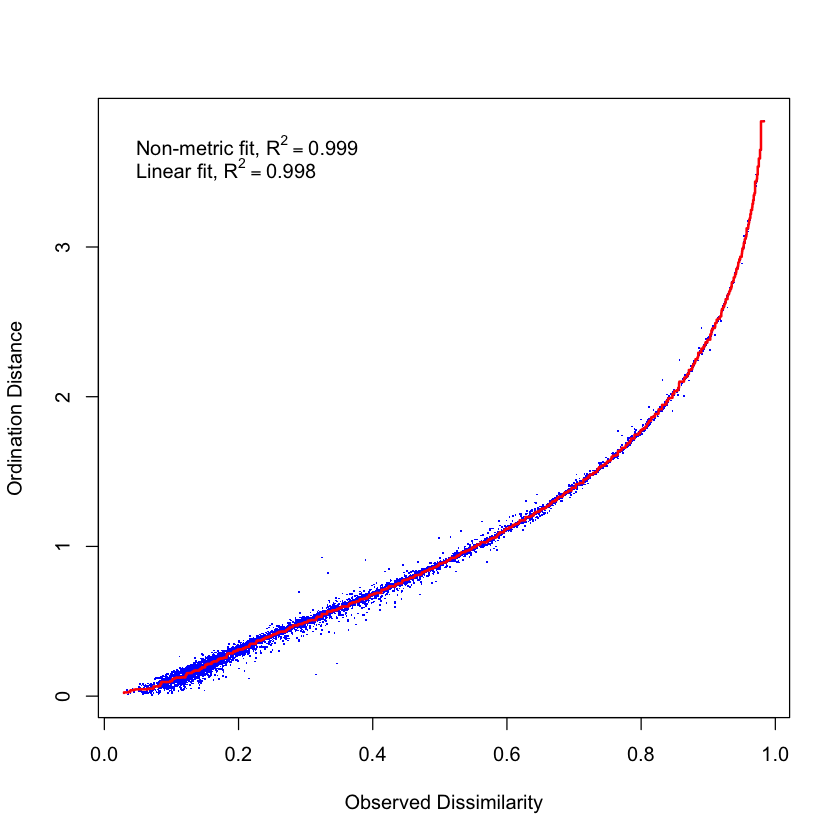

In [43]:
stressplot(SRM.nmds) 

## Make quick NMDS plot 
  * site (sample) in black circle
  * species (variable) in red ticks


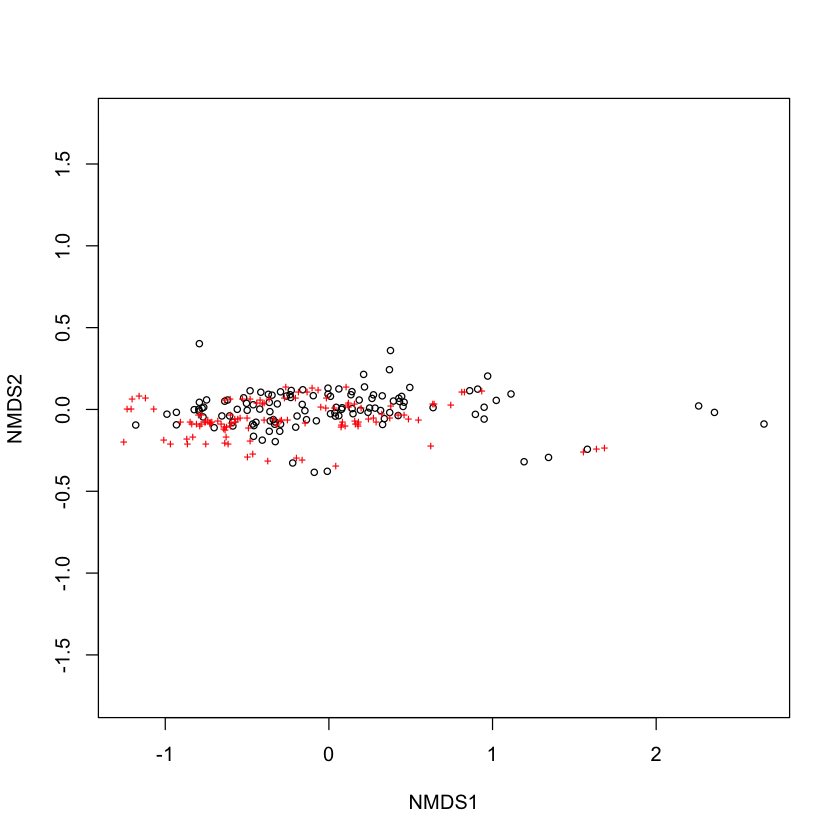

In [44]:
plot(SRM.nmds)

## Plot sample technical reps one by one, assessing how dissimilar the reps are via euclidian distance (aka, how close are the points to each other?)

This is a helpful resource:  https://stat.ethz.ch/pipermail/r-sig-ecology/2011-September/002371.html

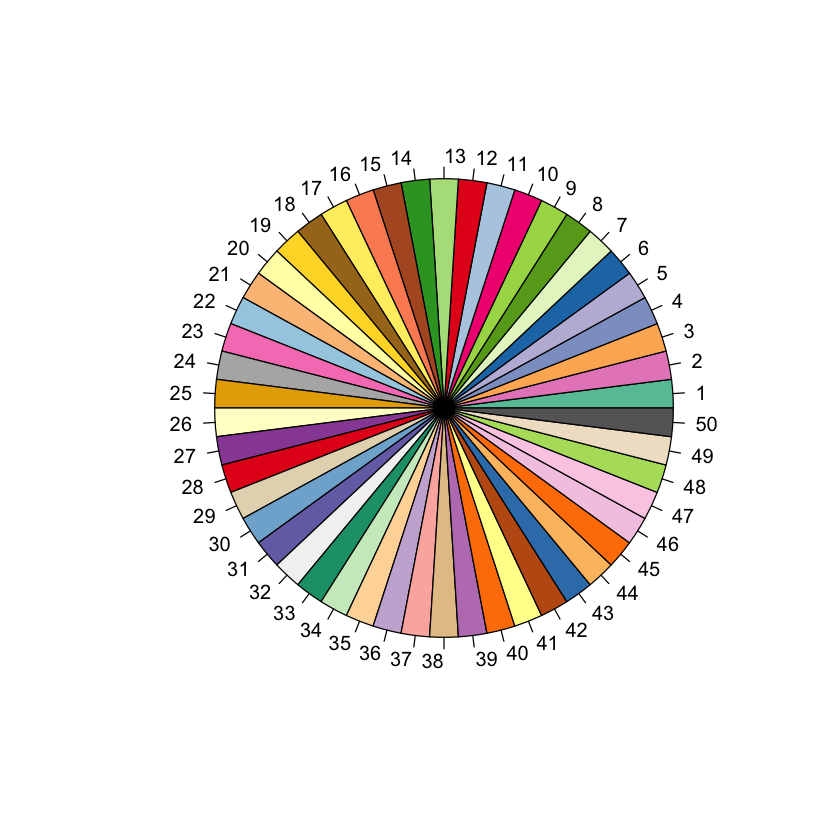

In [45]:
# Generate 50 distint color ID's in a vector for plotting NMDS data
library(RColorBrewer)
n <- 50
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
pie(rep(1,n), col=sample(col_vector, n))
colors <- sample(col_vector, 50)

In [46]:
# make vectors with sample annotations
SRM.nmds.samples <- scores(SRM.nmds, display = "sites")
SRM.nmds.transitions <- scores(SRM.nmds, display = "species")
SRM.nmds.samples.sorted <- SRM.nmds.samples[ order(row.names(SRM.nmds.samples)), ]
rownames(SRM.nmds.samples.sorted)

[1] "G001-A"        "G001-B"        "G002-A"        "G002-B"       
  [5] "G002-C"        "G003-A"        "G003-B"        "G003-C"       
  [9] "G007-A"        "G007-B"        "G008-A"        "G008-B"       
 [13] "G009-A"        "G009-B"        "G012-A"        "G012-B"       
 [17] "G012-C"        "G013-A"        "G013-C"        "G014-A"       
 [21] "G014-B"        "G015-A"        "G015-B"        "G016-A"       
 [25] "G016-B"        "G016-C"        "G017-A"        "G017-B"       
 [29] "G031-A"        "G031-B"        "G031-C"        "G032-A"       
 [33] "G032-B"        "G040-A"        "G040-B"        "G041-A"       
 [37] "G041-B"        "G042-A"        "G042-B"        "G042-C"       
 [41] "G043-A"        "G043-B"        "G045-A"        "G045-B"       
 [45] "G047-A"        "G047-B"        "G049-A"        "G049-B"       
 [49] "G053-A"        "G053-B"        "G053-remake-C" "G053-remake-D"
 [53] "G054-A"        "G054-B"        "G055-A"        "G055-B"       
 [57] "G055-C"        "G057-A"        "G057-B"        "G057-C"       
 [61] "G060-A"        "G060-B"        "G062-B"        "G062-C"       
 [65] "G064-A"        "G064-B"        "G066-A"        "G066-B"       
 [69] "G070-A"        "G070-B"        "G070-C"        "G071-A-A"     
 [73] "G071-A-B"      "G071-B-A"      "G071-B-B"      "G073-A"       
 [77] "G073-B"        "G073-C"        "G074-A"        "G074-B"       
 [81] "G079-A"        "G079-B"        "G081-A"        "G081-B"       
 [85] "G104-A"        "G104-B"        "G104-remake-C" "G104-remake-D"
 [89] "G105-A"        "G105-B"        "G109-A"        "G109-B"       
 [93] "G109-C"        "G110-A"        "G110-B"        "G114-A"       
 [97] "G114-B"        "G114-remake-C" "G114-remake-D" "G116-A"       
[101] "G116-B"        "G120-A"        "G120-B"        "G122-A"       
[105] "G122-B"        "G127-A"        "G127-B"        "G127-C"       
[109] "G128-A"        "G128-C"        "G128-D"        "G129-A"       
[113] "G129-B"        "G132-A"        "G132-C"        "G132-D"

## Plot 
When doing this in R or RStudio, I execute each point line by line, to see where all points are on the plot. I then noted which tech reps were not close. 
QUESTION: is there a way to quantitatively do this, aka calculate euclidian distance between tech. rep. points, and determine which do not meet a desginated threshold? 

### NOTE: I forced the aspect ratio to zoom in as far as possible. This should not be used in publication as it does not accurately represent similarity. 

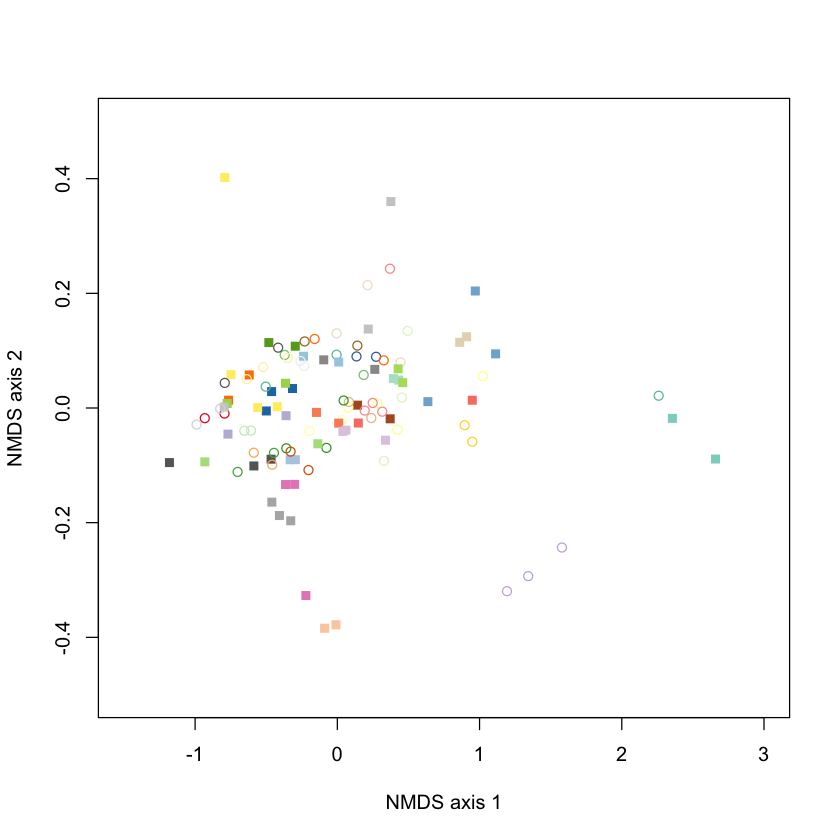

In [47]:
plot.default(x=NULL, y=NULL, type="n", xlab="NMDS axis 1", ylab="NMDS axis 2", xlim=c(-1.5,3), ylim=c(-0.5,0.5), asp=NA)
# symbol key
# 15 = eelgrass = filled square
# 21 = bare = open circle

points(SRM.nmds.samples.sorted[c("G001-A", "G001-B"),], col=colors[1], pch=15)
points(SRM.nmds.samples.sorted[c("G002-A", "G002-B", "G002-C"),], col=colors[50], pch=15)
points(SRM.nmds.samples.sorted[c("G003-A", "G003-B"),], col=colors[3], pch=15) #G003-C is very different
points(SRM.nmds.samples.sorted[c("G007-A", "G007-B"),], col=colors[4], pch=15)
points(SRM.nmds.samples.sorted[c("G008-A", "G008-B"),], col=colors[5], pch=15)
points(SRM.nmds.samples.sorted[c("G009-A", "G009-B"),], col=colors[6], pch=15)
points(SRM.nmds.samples.sorted[c("G012-A", "G012-B", "G012-C"),], col=colors[7], pch=21)
points(SRM.nmds.samples.sorted[c("G013-A", "G013-C"),], col=colors[8], pch=21)
points(SRM.nmds.samples.sorted[c("G014-A", "G014-B"),], col=colors[9], pch=21)
points(SRM.nmds.samples.sorted[c("G015-A", "G015-B"),], col=colors[10], pch=21)
points(SRM.nmds.samples.sorted[c("G016-A", "G016-B", "G016-C"),], col=colors[11], pch=21) #not good; three pretty distant, one definitely more distant
points(SRM.nmds.samples.sorted[c("G017-A", "G017-B"),], col=colors[12], pch=21) #not great
points(SRM.nmds.samples.sorted[c("G031-A", "G031-B", "G031-C"),], col=colors[13], pch=15)
points(SRM.nmds.samples.sorted[c("G032-A", "G032-B"),], col=colors[14], pch=15)
points(SRM.nmds.samples.sorted[c("G040-A", "G040-B"),], col=colors[15], pch=21)
points(SRM.nmds.samples.sorted[c("G041-A", "G041-B"),], col=colors[16], pch=21)
points(SRM.nmds.samples.sorted[c("G042-A", "G042-B", "G042-C"),], col=colors[17], pch=21) #G042-C very off
points(SRM.nmds.samples.sorted[c("G043-A", "G043-B"),], col=colors[18], pch=21)
points(SRM.nmds.samples.sorted[c("G045-A", "G045-B"),], col=colors[19], pch=15)
points(SRM.nmds.samples.sorted[c("G047-A", "G047-B"),], col=colors[20], pch=15)
points(SRM.nmds.samples.sorted[c("G049-A", "G049-B"),], col=colors[21], pch=15)
points(SRM.nmds.samples.sorted[c("G053-A", "G053-B", "G053-remake-C", "G053-remake-D"),], col=colors[22], pch=15) #remakes look good, A&B do not
points(SRM.nmds.samples.sorted[c("G054-A", "G054-B"),], col=colors[23], pch=15)
points(SRM.nmds.samples.sorted[c("G055-A", "G055-B"),], col=colors[24], pch=15) #one is very off
points(SRM.nmds.samples.sorted[c("G057-A", "G057-B", "G057-C"),], col=colors[25], pch=21) #one is off
points(SRM.nmds.samples.sorted[c("G060-A", "G060-B"),], col=colors[26], pch=21) 
points(SRM.nmds.samples.sorted[c("G062-B", "G062-C"),], col=colors[27], pch=21)
points(SRM.nmds.samples.sorted[c("G064-A", "G064-B"),], col=colors[50], pch=21)
points(SRM.nmds.samples.sorted[c("G066-A", "G066-B"),], col=colors[29], pch=21)
points(SRM.nmds.samples.sorted[c("G070-A", "G070-B", "G070-C"),], col=colors[30], pch=21)
points(SRM.nmds.samples.sorted[c("G071-A-A", "G071-A-B"),], col=colors[31], pch=15)
points(SRM.nmds.samples.sorted[c("G071-B-A", "G071-B-B"),], col=colors[32], pch=15)
points(SRM.nmds.samples.sorted[c("G073-A", "G073-B", "G073-C"),], col=colors[33], pch=15) #all three very off
points(SRM.nmds.samples.sorted[c("G074-A", "G074-B"),], col=colors[34], pch=15)
points(SRM.nmds.samples.sorted[c("G079-A", "G079-B"),], col=colors[35], pch=21)
points(SRM.nmds.samples.sorted[c("G081-A", "G081-B"),], col=colors[36], pch=21)
points(SRM.nmds.samples.sorted[c("G104-A", "G104-B", "G104-remake-C", "G104-remake-D"),], col=colors[37], pch=21) #check these out too
points(SRM.nmds.samples.sorted[c("G105-A", "G105-B"),], col=colors[38], pch=21)
points(SRM.nmds.samples.sorted[c("G109-A", "G109-B", "G109-C"),], col=colors[39], pch=15)
points(SRM.nmds.samples.sorted[c("G110-A", "G110-B"),], col=colors[40], pch=15)
points(SRM.nmds.samples.sorted[c("G114-B", "G114-remake-C", "G114-remake-D"),], col=colors[41], pch=21) # check these out!
points(SRM.nmds.samples.sorted[c("G116-A", "G116-B"),], col=colors[42], pch=21)
points(SRM.nmds.samples.sorted[c("G120-A", "G120-B"),], col=colors[43], pch=21)
points(SRM.nmds.samples.sorted[c("G122-A", "G122-B"),], col=colors[44], pch=21)
points(SRM.nmds.samples.sorted[c("G127-A", "G127-B", "G127-C"),], col=colors[45], pch=15) #one is off
points(SRM.nmds.samples.sorted[c("G128-A", "G128-C", "G128-D"),], col=colors[46], pch=15)
points(SRM.nmds.samples.sorted[c("G129-A", "G129-B"),], col=colors[47], pch=15)
points(SRM.nmds.samples.sorted[c("G132-A", "G132-C", "G132-D"),], col=colors[48], pch=15)


## Remove tech reps that don't look good, then average tech reps and re-plot by site/treatment

In [48]:
# average sample technical reps.  (there's probably an easier way to do this to not manually enter the tech rep names for each sample, possibly via a loop?); remove reps that were poor quality as per NMDS
G013 <- ave(SRM.data.normalized$'G013-A', SRM.data.normalized$'G013-C')
G120 <- ave(SRM.data.normalized$`G120-A`, SRM.data.normalized$`G120-B`)
G047 <- ave(SRM.data.normalized$`G047-A`, SRM.data.normalized$`G047-B`)
G017 <- ave(SRM.data.normalized$`G017-A`, SRM.data.normalized$`G017-B`)
G079 <- ave(SRM.data.normalized$`G079-A`, SRM.data.normalized$`G079-B`)
G127 <- ave(SRM.data.normalized$`G127-A`, SRM.data.normalized$`G127-C`) #B removed
G060 <- ave(SRM.data.normalized$`G060-A`, SRM.data.normalized$`G060-B`)
G009 <- ave(SRM.data.normalized$`G009-A`, SRM.data.normalized$`G009-B`)
G002 <- ave(SRM.data.normalized$`G002-B`, SRM.data.normalized$`G002-C`) #A removed
G128 <- ave(SRM.data.normalized$`G128-A`, SRM.data.normalized$`G128-C`,SRM.data.normalized$`G128-D`)
G016 <- ave(SRM.data.normalized$`G016-A`, SRM.data.normalized$`G016-B`, SRM.data.normalized$`G016-C`)
G071.A <- ave(SRM.data.normalized$`G071-A-A`, SRM.data.normalized$`G071-A-B`)
G114 <- ave(SRM.data.normalized$`G114-A`, SRM.data.normalized$`G114-B`, SRM.data.normalized$`G114-remake-C`, SRM.data.normalized$`G114-remake-D`)
G045 <- ave(SRM.data.normalized$`G045-A`, SRM.data.normalized$`G045-B`)
G132 <- ave(SRM.data.normalized$`G132-A`, SRM.data.normalized$`G132-C`, SRM.data.normalized$`G132-D`)
G031 <- ave(SRM.data.normalized$`G031-A`, SRM.data.normalized$`G031-B`, SRM.data.normalized$`G031-C`)
G012 <- ave(SRM.data.normalized$`G012-A`, SRM.data.normalized$`G012-B`, SRM.data.normalized$`G012-C`)
G116 <- ave(SRM.data.normalized$`G116-A`, SRM.data.normalized$`G116-B`)
G043 <- ave(SRM.data.normalized$`G043-A`, SRM.data.normalized$`G043-B`)
G015 <- ave(SRM.data.normalized$`G015-A`, SRM.data.normalized$`G015-B`)
G040 <- ave(SRM.data.normalized$`G040-A`, SRM.data.normalized$`G040-B`)
G110 <- ave(SRM.data.normalized$`G110-A`, SRM.data.normalized$`G110-B`)
G008 <- ave(SRM.data.normalized$`G008-A`, SRM.data.normalized$`G008-B`)
G109 <- ave(SRM.data.normalized$`G109-A`, SRM.data.normalized$`G109-B`, SRM.data.normalized$`G109-C`)
G122 <- ave(SRM.data.normalized$`G122-A`, SRM.data.normalized$`G122-B`)
G041 <- ave(SRM.data.normalized$`G041-A`, SRM.data.normalized$`G041-B`)
G066 <- ave(SRM.data.normalized$`G066-A`, SRM.data.normalized$`G066-B`)
G105 <- ave(SRM.data.normalized$`G105-A`, SRM.data.normalized$`G105-B`)
G032 <- ave(SRM.data.normalized$`G032-A`, SRM.data.normalized$`G032-B`)
G129 <- ave(SRM.data.normalized$`G129-A`, SRM.data.normalized$`G129-B`)
G054 <- ave(SRM.data.normalized$`G054-A`, SRM.data.normalized$`G054-B`)
G081 <- ave(SRM.data.normalized$`G081-A`, SRM.data.normalized$`G081-B`)
G003 <- ave(SRM.data.normalized$`G003-A`, SRM.data.normalized$`G003-B`) #C removed
G074 <- ave(SRM.data.normalized$`G074-A`, SRM.data.normalized$`G074-B`)
G014 <- ave(SRM.data.normalized$`G014-A`, SRM.data.normalized$`G014-B`)
G049 <- ave(SRM.data.normalized$`G049-A`, SRM.data.normalized$`G049-B`)
G053 <- ave(SRM.data.normalized$`G053-A`, SRM.data.normalized$`G053-remake-C`, SRM.data.normalized$`G053-remake-D`) #B removed 
G104 <- ave(SRM.data.normalized$`G104-A`, SRM.data.normalized$`G104-remake-C`, SRM.data.normalized$`G104-remake-D`) #B removed
G055 <- ave(SRM.data.normalized$`G055-A`, SRM.data.normalized$`G055-B`, SRM.data.normalized$`G055-C`)
G042 <- ave(SRM.data.normalized$`G042-A`, SRM.data.normalized$`G042-B`) #C removed
G064 <- ave(SRM.data.normalized$`G064-A`, SRM.data.normalized$`G064-B`)
G073 <- ave(SRM.data.normalized$`G073-A`, SRM.data.normalized$`G073-B`, SRM.data.normalized$`G073-C`)
G057 <- ave(SRM.data.normalized$`G057-A`, SRM.data.normalized$`G057-B`, SRM.data.normalized$`G057-C`)
G007 <- ave(SRM.data.normalized$`G007-A`, SRM.data.normalized$`G007-B`)
G070 <- ave(SRM.data.normalized$`G070-A`, SRM.data.normalized$`G070-B`, SRM.data.normalized$`G070-C`)
G001 <- ave(SRM.data.normalized$`G001-A`, SRM.data.normalized$`G001-B`)
G071.B <- ave(SRM.data.normalized$`G071-B-A`, SRM.data.normalized$`G071-B-B`)
G062 <- ave(SRM.data.normalized$`G062-B`, SRM.data.normalized$`G062-C`)

SRM.data.mean <- cbind.data.frame(rownames(SRM.data.normalized), G013, G120, G047, G017, G079, G127, G060, G009, G002, G128, G016, G071.A, G114, G045, G132, G031, G012, G116, G043, G015, G040, G110, G008, G109, G122, G041, G066, G105, G032, G129, G054, G081, G003, G074, G014, G049, G053, G104, G055, G042, G064, G073, G057, G007, G070,  G001, G071.B, G062) # combine all tech. replicate mean vectors into new data frame 
head(SRM.data.mean)

rownames(SRM.data.normalized),G013,G120,G047,G017,G079,G127,G060,G009,G002,⋯,G055,G042,G064,G073,G057,G007,G070,G001,G071.B,G062
GVVDSEDLPLNISR y11,0.007744885,0.01617425,0.005817556,0.01158952,0.02278616,0.010507745,0.02271242,0.003892190,0.01005627,⋯,0.01095298,0.007983845,0.01104736,0.005681914,0.007531888,0.008731747,0.01374575,0.004948678,0.002520421,0.005385742
GVVDSEDLPLNISR y7,0.014976341,0.03400834,0.011250342,0.02373362,0.05130385,0.021303057,0.04993999,0.007693514,0.02209005,⋯,0.02348293,0.016663008,0.02347865,0.011442378,0.014866007,0.017974508,0.02938459,0.009612502,0.004801840,0.010800712
GVVDSEDLPLNISR y6,0.048426131,0.10497801,0.036103825,0.07557779,0.16523907,0.066311505,0.15788855,0.024107962,0.06808997,⋯,0.07481839,0.053196217,0.07574062,0.037251938,0.049411515,0.057234180,0.09234399,0.031141239,0.015375188,0.034519303
EVVQSSAFVER y8,0.027886582,0.04274662,0.015929543,0.03620482,0.08013764,0.020337413,0.06178914,0.013236388,0.03262511,⋯,0.03265413,0.018932380,0.04445703,0.013987046,0.028014735,0.025634288,0.05057675,0.016729087,0.009657397,0.022997665
EVVQSSAFVER y7,0.048135676,0.07350470,0.026520627,0.06364374,0.14441518,0.034485767,0.11062454,0.021594652,0.05659806,⋯,0.05916516,0.032179443,0.07833349,0.022715200,0.048127561,0.044588805,0.08948451,0.027493495,0.015748794,0.037991042
EVVQSSAFVER y6,0.012005325,0.01862374,0.006714709,0.01601290,0.03724249,0.009030294,0.02893022,0.005528939,0.01464717,⋯,0.01551501,0.008080694,0.02055191,0.005801896,0.012064472,0.011298784,0.02275235,0.006936154,0.004016905,0.010108383


### Create NMDS plot of samples (tech reps averaged)

In [49]:
#Load the source file for the biostats package, biostats.R script must be saved in working directory

source("References/biostats.R") #Either load the source R script or copy paste. Must run this code before NMDS.
library(vegan)

#Transpose the file so that rows and columns are switched 
rownames(SRM.data.mean) <- SRM.data.mean[,1]
SRM.data.mean <- SRM.data.mean[,-1]
SRM.data.mean.t <- t(SRM.data.mean) # t() function transposes

#Replace NA cells with 0; metaMDS() does not handle NA's
SRM.data.mean.t.noNA <- SRM.data.mean.t
SRM.data.mean.t.noNA[is.na(SRM.data.mean.t.noNA)] <- 0

#Make MDS dissimilarity matrix
#
SRM.mean.nmds <- metaMDS(SRM.data.mean.t.noNA, distance = 'bray', k = 2, trymax = 3000, autotransform = FALSE)
# comm= your data.frame or matrix
# distance= bray, (not sure what this means)
# k= # of dimensions to assess
# trymax = max # iterations to attempt if no solution is reached

Run 0 stress 0.02065654 
Run 1 stress 0.02065599 
... New best solution
... Procrustes: rmse 0.009602005  max resid 0.0571978 
Run 2 stress 0.01897142 
... New best solution
... Procrustes: rmse 0.02690931  max resid 0.1264889 
Run 3 stress 0.02677158 
Run 4 stress 0.02770089 
Run 5 stress 0.01985825 
Run 6 stress 0.01955591 
Run 7 stress 0.01892332 
... New best solution
... Procrustes: rmse 0.01940932  max resid 0.1104561 
Run 8 stress 0.02738215 
Run 9 stress 0.0194333 
Run 10 stress 0.01862387 
... New best solution
... Procrustes: rmse 0.01074295  max resid 0.04088815 
Run 11 stress 0.01948284 
Run 12 stress 0.01959112 
Run 13 stress 0.02763865 
Run 14 stress 0.01897786 
... Procrustes: rmse 0.01891468  max resid 0.1063696 
Run 15 stress 0.02646214 
Run 16 stress 0.02070509 
Run 17 stress 0.02070368 
Run 18 stress 0.01883652 
... Procrustes: rmse 0.01988573  max resid 0.1156875 
Run 19 stress 0.02043218 
Run 20 stress 0.02658863 
Run 21 stress 0.01860539 
... New best solution
...

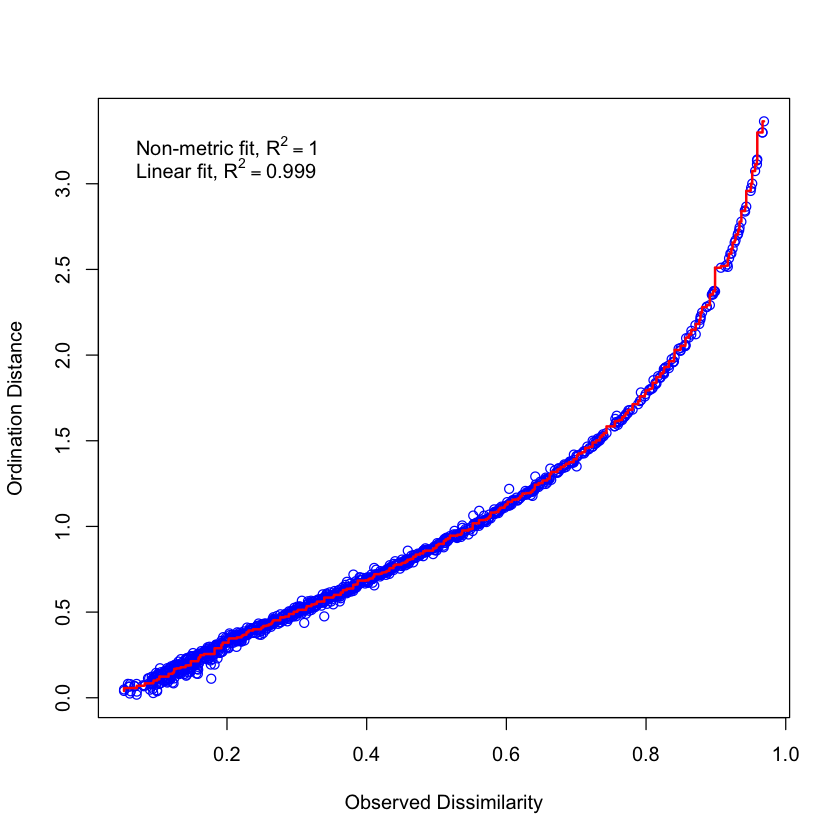

In [50]:
# Create Shepard plot, which shows scatter around the regression between the interpoint distances in the final configuration (i.e., the distances between each pair of communities) against their original dissimilarities.
stressplot(SRM.mean.nmds) 

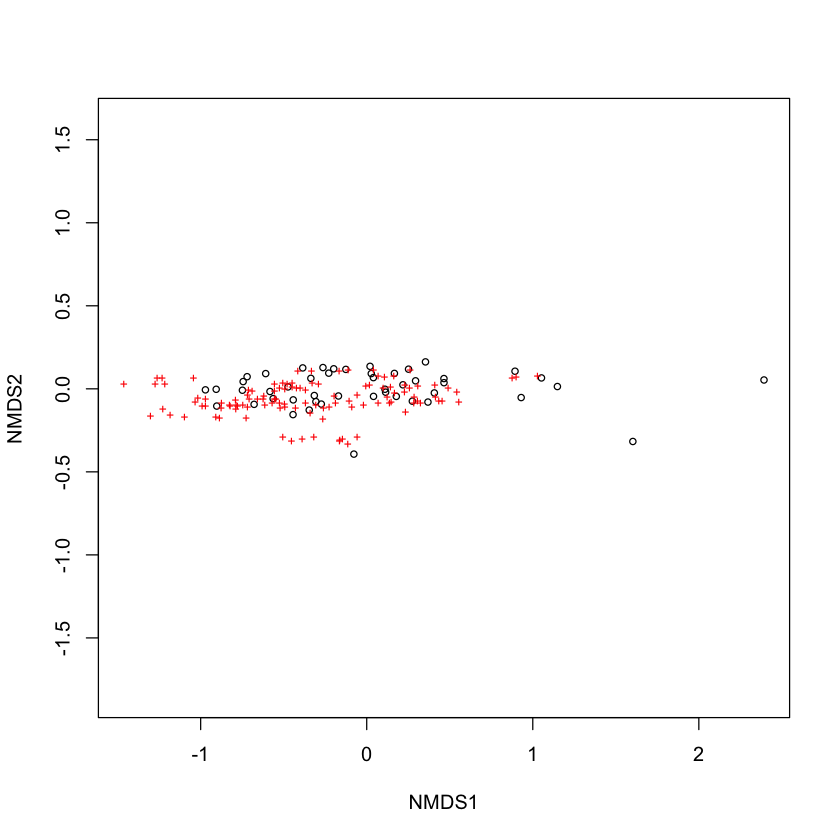

In [51]:
#Make figure

plot(SRM.mean.nmds)
# site (sample) in black circle
# species (variable) in red ticks

# make figure with sample annotations https://stat.ethz.ch/pipermail/r-sig-ecology/2011-September/002371.html
SRM.nmds.mean.samples <- scores(SRM.mean.nmds, display = "sites")
SRM.nmds.mean.transitions <- scores(SRM.nmds, display = "species")
# this probably isn't necessary

### Let's plot using ordiplot()

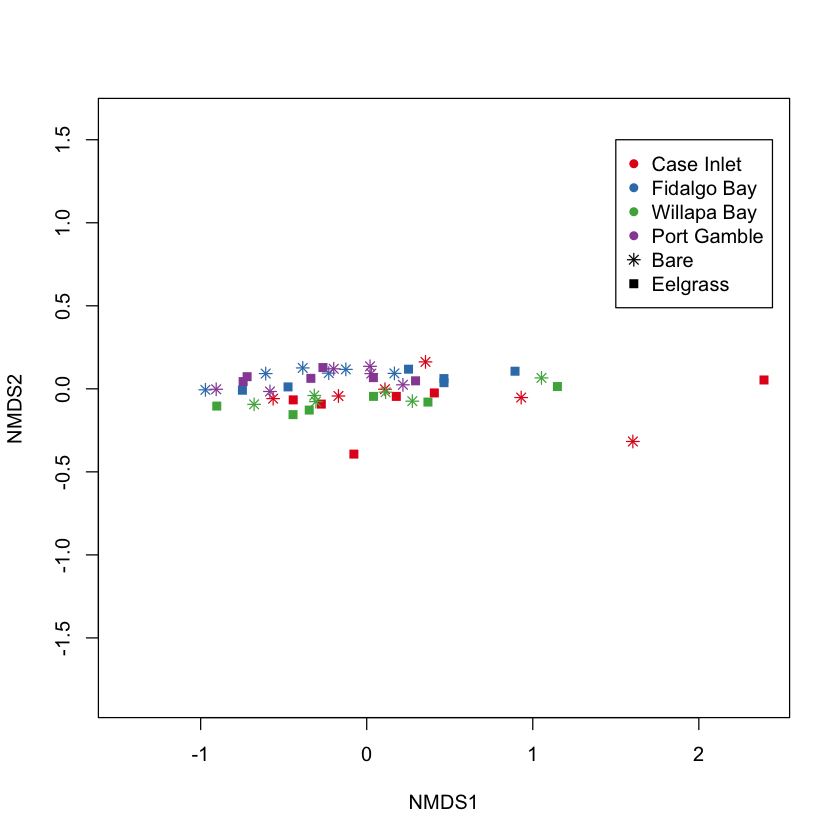

In [53]:
library(RColorBrewer)
marker = c(color = brewer.pal(4, "Set1"))

ordiplot(SRM.mean.nmds, type="n")
points(SRM.nmds.mean.samples[c(CI.B.samples),], col=marker[1], pch=8)
points(SRM.nmds.mean.samples[c(CI.E.samples),], col=marker[1], pch=15)
points(SRM.nmds.mean.samples[c(PG.B.samples),], col=marker[2], pch=8)
points(SRM.nmds.mean.samples[c(PG.E.samples),], col=marker[2], pch=15)
points(SRM.nmds.mean.samples[c(WB.B.samples),], col=marker[3], pch=8)
points(SRM.nmds.mean.samples[c(WB.E.samples),], col=marker[3], pch=15)
points(SRM.nmds.mean.samples[c(FB.B.samples),], col=marker[4], pch=8)
points(SRM.nmds.mean.samples[c(FB.E.samples),], col=marker[4], pch=15)

legend(1.5,1.5, pch=c(rep(16,4), 8, 15), legend=c('Case Inlet', "Fidalgo Bay", "Willapa Bay", "Port Gamble", "Bare", "Eelgrass"), col=c(marker[1], marker[2], marker[3], marker[4], "black", "black"))

### Now let's create plot with forced aspect ratio to zoom in 

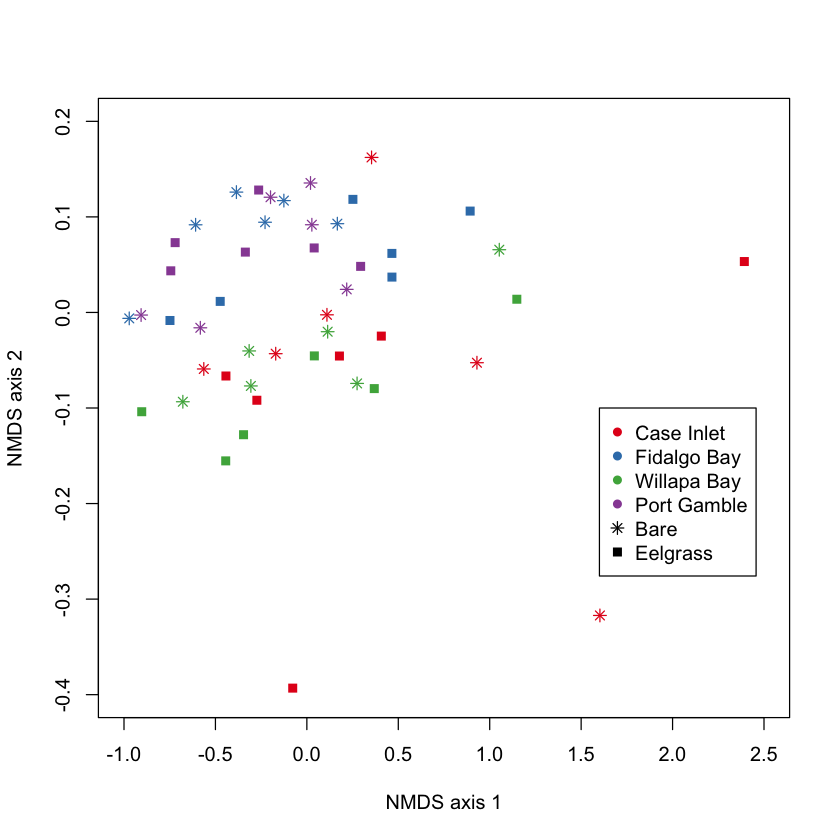

In [56]:
plot.default(x=NULL, y=NULL, type="n", xlab="NMDS axis 1", ylab="NMDS axis 2", xlim=c(-1,2.5), ylim=c(-0.4,0.2), asp=NA)

points(SRM.nmds.mean.samples[c(CI.B.samples),], col=marker[1], pch=8)
points(SRM.nmds.mean.samples[c(CI.E.samples),], col=marker[1], pch=15)
points(SRM.nmds.mean.samples[c(PG.B.samples),], col=marker[2], pch=8)
points(SRM.nmds.mean.samples[c(PG.E.samples),], col=marker[2], pch=15)
points(SRM.nmds.mean.samples[c(WB.B.samples),], col=marker[3], pch=8)
points(SRM.nmds.mean.samples[c(WB.E.samples),], col=marker[3], pch=15)
points(SRM.nmds.mean.samples[c(FB.B.samples),], col=marker[4], pch=8)
points(SRM.nmds.mean.samples[c(FB.E.samples),], col=marker[4], pch=15)

legend(1.6,-0.1, pch=c(rep(16,4), 8, 15), legend=c('Case Inlet', "Fidalgo Bay", "Willapa Bay", "Port Gamble", "Bare", "Eelgrass"), col=c(marker[1], marker[2], marker[3], marker[4], "black", "black"))

### Initial thoughts:
  * Port Gamble & Fidalgo Bay geoduck appear to be clustered, while Case Inlet & Willapa Bay appear to be clustered.
  * Eelgrass & bare treatments do not appear to be obviously dissimilar across sites.
  * Within Willapa Bay (green) and Fidalgo Bay (blue), eelgrass and bare treatments appear to be slightly dissimilar, where Bare is slightly NW of Eelgrass. 